In [140]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading CSV file from local route

In [141]:
def read_csv(dataset_path):
    current_path = os.getcwd()
    aux_curr_path = current_path
    project_path = aux_curr_path.replace('/notebooks', '')
    dataset_path = os.path.join(project_path, dataset_path)
    return dataset_path

In [142]:
CSV_PATH = "dataset/Datos_Imgenes.csv"
df = pd.read_csv(read_csv(CSV_PATH))

Deleting unecessary columns 

In [143]:
columns_to_delete = ["Index", "Date", "Page", "TotalPages","ModelApplied", "Details","ModelReported"]
updated_df = df.drop(columns=columns_to_delete, axis=1)


In [144]:
updated_df.head(10)

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,comprobante_domicilio,NaN,1,12,0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
1,recibo_nomina,NaN,1,15,0,0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,recibo_nomina,NaN,1,15,3,0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS
3,ine,NaN,1,38,11,0.914,0.925,0.917,157.0,38.0,6140.0,356.0,INE
4,estado_cuenta,TXN,2,27,1,0.914,0.934,0.920,262.0,36.0,9512.0,479.0,EC
5,estado_cuenta,TXN,2,27,1,0.914,0.934,0.920,273.0,35.0,9706.0,491.0,EC
6,carta_libranza,NaN,1,19,0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
7,ine,NaN,1,38,11,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
8,carta_libranza,NaN,1,19,0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
9,ine,NaN,1,38,11,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE


# Creating a filter on Model column 

In [145]:
models = updated_df["Model"].value_counts()
models

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64

## Displaying all diferent values in "estado_cuenta"

In [146]:
filt_df_estado_cuenta = updated_df[updated_df['Model'] == "estado_cuenta"]
filt_df_estado_cuenta["ClassId"].value_counts()

ClassId
TXN    26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64

## Displaying all diferent values in "recibo_nomina"

In [147]:
filt_df_recibo_nomina = updated_df[updated_df['Model'] == "recibo_nomina"]
filt_df_recibo_nomina["DocType"].value_counts()

DocType
IMSS      5453
ISSSTE    2077
SEP       1360
PEMEX      865
IMSS3      438
Name: count, dtype: int64

## Displaying all diferent values in "ine"

In [148]:
filt_df_ine = updated_df[updated_df['Model'] == "ine"]
filt_df_ine["DocType"].value_counts()

DocType
INE     9336
PASS      10
Name: count, dtype: int64

## Displaying all diferent values in "comprobante_domicilio"

In [149]:
filt_df_comprobante_dom = updated_df[updated_df['Model'] == "comprobante_domicilio"]
filt_df_comprobante_dom["DocType"].value_counts()

DocType
CFE      4512
AGUA      726
TEL       224
CABLE     179
CONST      78
GAS        61
Name: count, dtype: int64

## Displaying all diferent values in "carta_libranza"

In [150]:
filt_df_carta_lib = updated_df[updated_df['Model'] == "carta_libranza"]
filt_df_carta_lib["DocType"].value_counts()

DocType
CLIB    3501
Name: count, dtype: int64

# PREPROCESING PER MODEL 

## Model- Estado cuenta

In [151]:
filt_df_estado_cuenta.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
4,estado_cuenta,TXN,2,27,1,0.914,0.934,0.920,262.0,36.0,9512.0,479.0,EC
5,estado_cuenta,TXN,2,27,1,0.914,0.934,0.920,273.0,35.0,9706.0,491.0,EC
10,estado_cuenta,TXN,4,27,18,0.834,0.610,0.767,1573.0,64.0,100811.0,1446.0,EC
11,estado_cuenta,TXN,4,27,18,0.834,0.610,0.767,25.0,38.0,981.0,101.0,EC
12,estado_cuenta,TXN,4,27,18,0.834,0.610,0.767,154.0,51.0,7973.0,340.0,EC


In [152]:
filt_df_estado_cuenta.drop(columns="Model", inplace=True)
filt_df_estado_cuenta


/var/folders/hc/3khftnwn5j75vz_4z4391z9r0000gn/T/ipykernel_16515/486114438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df_estado_cuenta.drop(columns="Model", inplace=True)


,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
4,TXN,2,27,1,0.914,0.934,0.920,262.000000,36.000000,9512.000000,479.000000,EC
5,TXN,2,27,1,0.914,0.934,0.920,273.000000,35.000000,9706.000000,491.000000,EC
10,TXN,4,27,18,0.834,0.610,0.767,1573.000000,64.000000,100811.000000,1446.000000,EC
11,TXN,4,27,18,0.834,0.610,0.767,25.000000,38.000000,981.000000,101.000000,EC
12,TXN,4,27,18,0.834,0.610,0.767,154.000000,51.000000,7973.000000,340.000000,EC
...,...,...,...,...,...,...,...,...,...,...,...,...
62882,APP,1,0,0,0.890,0.916,0.898,61.794301,54.614479,3374.863560,243.595843,APP
62883,TXN,3,0,0,0.914,0.851,0.895,216.913444,42.823179,9288.923238,623.457682,EC
62884,TXN,3,0,0,0.914,0.851,0.895,219.959205,44.057762,9690.910275,645.235095,EC
62885,TXN,3,0,0,0.914,0.851,0.895,208.455581,40.573870,8457.849713,580.671118,EC


In [153]:
filt_df_estado_cuenta["ClassId"].value_counts()

ClassId
TXN    26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64

### Codification OneHot for categorical columns

In [154]:
df_estado_cuenta_coded = pd.get_dummies(filt_df_estado_cuenta, columns=["ClassId"], drop_first=False)
df_estado_cuenta_coded 

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType,ClassId_APP,ClassId_ATM,ClassId_SUC,ClassId_TXN
4,2,27,1,0.914,0.934,0.920,262.000000,36.000000,9512.000000,479.000000,EC,False,False,False,True
5,2,27,1,0.914,0.934,0.920,273.000000,35.000000,9706.000000,491.000000,EC,False,False,False,True
10,4,27,18,0.834,0.610,0.767,1573.000000,64.000000,100811.000000,1446.000000,EC,False,False,False,True
11,4,27,18,0.834,0.610,0.767,25.000000,38.000000,981.000000,101.000000,EC,False,False,False,True
12,4,27,18,0.834,0.610,0.767,154.000000,51.000000,7973.000000,340.000000,EC,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62882,1,0,0,0.890,0.916,0.898,61.794301,54.614479,3374.863560,243.595843,APP,True,False,False,False
62883,3,0,0,0.914,0.851,0.895,216.913444,42.823179,9288.923238,623.457682,EC,False,False,False,True
62884,3,0,0,0.914,0.851,0.895,219.959205,44.057762,9690.910275,645.235095,EC,False,False,False,True
62885,3,0,0,0.914,0.851,0.895,208.455581,40.573870,8457.849713,580.671118,EC,False,False,False,True


### Data frame estado_cuenta details: 
#### Rows: 34140 and Columns: 14

In [155]:
df_estado_cuenta_coded.shape  

(34140, 15)

In [156]:
df_estado_cuenta_coded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34140 entries, 4 to 62887
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  34140 non-null  int64  
 1   Fields          34140 non-null  int64  
 2   EmptyFields     34140 non-null  int64  
 3   ConfR           34140 non-null  float64
 4   ConfA           34140 non-null  float64
 5   ConfW           34140 non-null  float64
 6   Sharpness       34140 non-null  float64
 7   Contrast        34140 non-null  float64
 8   Clarity         34140 non-null  float64
 9   Resolution      34140 non-null  float64
 10  DocType         34140 non-null  object 
 11  ClassId_APP     34140 non-null  bool   
 12  ClassId_ATM     34140 non-null  bool   
 13  ClassId_SUC     34140 non-null  bool   
 14  ClassId_TXN     34140 non-null  bool   
dtypes: bool(4), float64(7), int64(3), object(1)
memory usage: 3.3+ MB


In [157]:
df_estado_cuenta_coded.isnull().sum()

PagesProcessed    0
Fields            0
EmptyFields       0
ConfR             0
ConfA             0
ConfW             0
Sharpness         0
Contrast          0
Clarity           0
Resolution        0
DocType           0
ClassId_APP       0
ClassId_ATM       0
ClassId_SUC       0
ClassId_TXN       0
dtype: int64

## Taking ClassId for classification

### X axis - Contrast
### y axis - Resolution

In [158]:
X = df_estado_cuenta_coded.iloc[:,[7,9]].values

In [159]:
X[0]

array([ 36., 479.])

## Preliminary number of clusters 

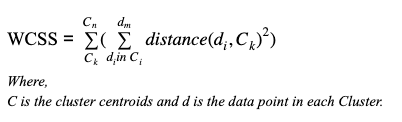

In [160]:
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

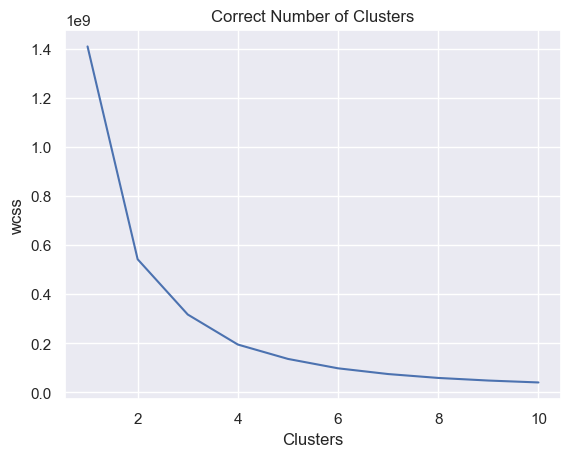

In [161]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

### Best number of cluster is 4 based on Graph 

### Preliminary training

In [162]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


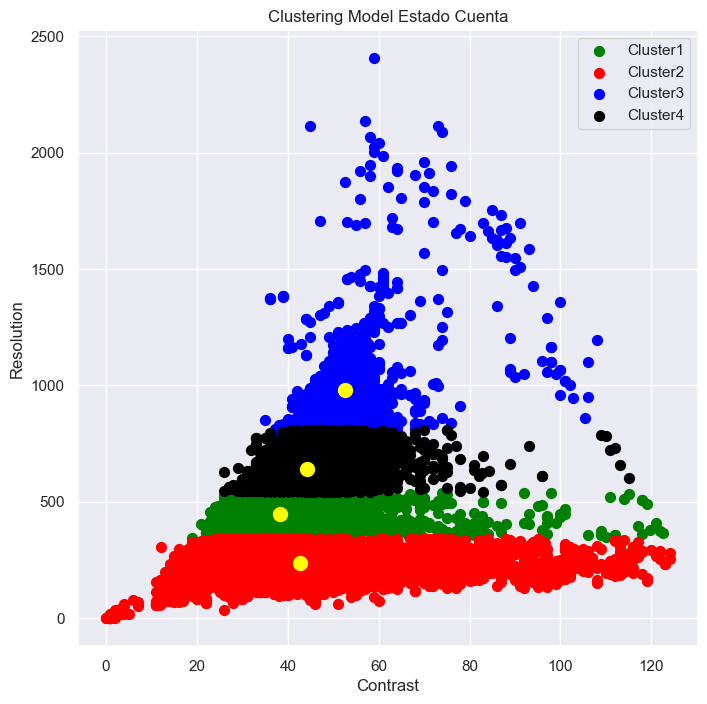

In [163]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c="black", label="Cluster4")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model Estado Cuenta")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()


## Model- Recibo de Nomina

In [164]:
filt_df_recibo_nomina.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
1,recibo_nomina,NaN,1,15,0,0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,recibo_nomina,NaN,1,15,3,0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS
14,recibo_nomina,NaN,1,15,0,0.973,0.785,0.917,370.0,37.0,14051.0,597.0,IMSS
15,recibo_nomina,NaN,1,15,0,0.973,0.770,0.912,328.0,36.0,11983.0,538.0,IMSS
43,recibo_nomina,NaN,1,15,1,0.969,0.745,0.902,711.0,59.0,42005.0,1071.0,IMSS3


In [166]:
filt_df_recibo_nomina.drop(columns=["Model","ClassId"], inplace=True)
filt_df_recibo_nomina

/var/folders/hc/3khftnwn5j75vz_4z4391z9r0000gn/T/ipykernel_16515/1790671883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df_recibo_nomina.drop(columns=["Model","ClassId"], inplace=True)


,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
1,1,15,0,0.948,0.931,0.943,399.000000,42.000000,17045.000000,672.000000,IMSS
2,1,15,3,0.941,0.837,0.910,166.000000,29.000000,4866.000000,233.000000,IMSS
14,1,15,0,0.973,0.785,0.917,370.000000,37.000000,14051.000000,597.000000,IMSS
15,1,15,0,0.973,0.770,0.912,328.000000,36.000000,11983.000000,538.000000,IMSS
43,1,15,1,0.969,0.745,0.902,711.000000,59.000000,42005.000000,1071.000000,IMSS3
...,...,...,...,...,...,...,...,...,...,...,...
62937,1,0,0,0.999,0.799,0.939,126.769108,42.320780,5364.967501,389.118647,ISSSTE
62938,1,0,0,0.999,0.785,0.935,126.069405,42.003501,5295.356420,384.030618,ISSSTE
62950,1,0,0,0.941,0.644,0.852,368.489270,45.789754,16873.033040,301.593351,IMSS
62955,1,0,0,0.999,0.800,0.939,160.990592,43.946808,7075.022648,433.700159,ISSSTE


In [167]:
filt_df_estado_cuenta["DocType"].value_counts()

DocType
EC     26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64

In [169]:
filt_df_recibo_nomina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 1 to 62956
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  10193 non-null  int64  
 1   Fields          10193 non-null  int64  
 2   EmptyFields     10193 non-null  int64  
 3   ConfR           10193 non-null  float64
 4   ConfA           10193 non-null  float64
 5   ConfW           10193 non-null  float64
 6   Sharpness       10193 non-null  float64
 7   Contrast        10193 non-null  float64
 8   Clarity         10193 non-null  float64
 9   Resolution      10193 non-null  float64
 10  DocType         10193 non-null  object 
dtypes: float64(7), int64(3), object(1)
memory usage: 955.6+ KB


### Codification OneHot for categorical columns

In [171]:
df_recibo_nomina_coded = pd.get_dummies(filt_df_recibo_nomina, columns=["DocType"], drop_first=False)
df_recibo_nomina_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_IMSS,DocType_IMSS3,DocType_ISSSTE,DocType_PEMEX,DocType_SEP
1,1,15,0,0.948,0.931,0.943,399.000000,42.000000,17045.000000,672.000000,True,False,False,False,False
2,1,15,3,0.941,0.837,0.910,166.000000,29.000000,4866.000000,233.000000,True,False,False,False,False
14,1,15,0,0.973,0.785,0.917,370.000000,37.000000,14051.000000,597.000000,True,False,False,False,False
15,1,15,0,0.973,0.770,0.912,328.000000,36.000000,11983.000000,538.000000,True,False,False,False,False
43,1,15,1,0.969,0.745,0.902,711.000000,59.000000,42005.000000,1071.000000,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62937,1,0,0,0.999,0.799,0.939,126.769108,42.320780,5364.967501,389.118647,False,False,True,False,False
62938,1,0,0,0.999,0.785,0.935,126.069405,42.003501,5295.356420,384.030618,False,False,True,False,False
62950,1,0,0,0.941,0.644,0.852,368.489270,45.789754,16873.033040,301.593351,True,False,False,False,False
62955,1,0,0,0.999,0.800,0.939,160.990592,43.946808,7075.022648,433.700159,False,False,True,False,False


In [172]:
df_recibo_nomina_coded.isnull().sum()

PagesProcessed    0
Fields            0
EmptyFields       0
ConfR             0
ConfA             0
ConfW             0
Sharpness         0
Contrast          0
Clarity           0
Resolution        0
DocType_IMSS      0
DocType_IMSS3     0
DocType_ISSSTE    0
DocType_PEMEX     0
DocType_SEP       0
dtype: int64

## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [177]:
X = df_recibo_nomina_coded.iloc[:,[7,9]].values

In [178]:
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [179]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


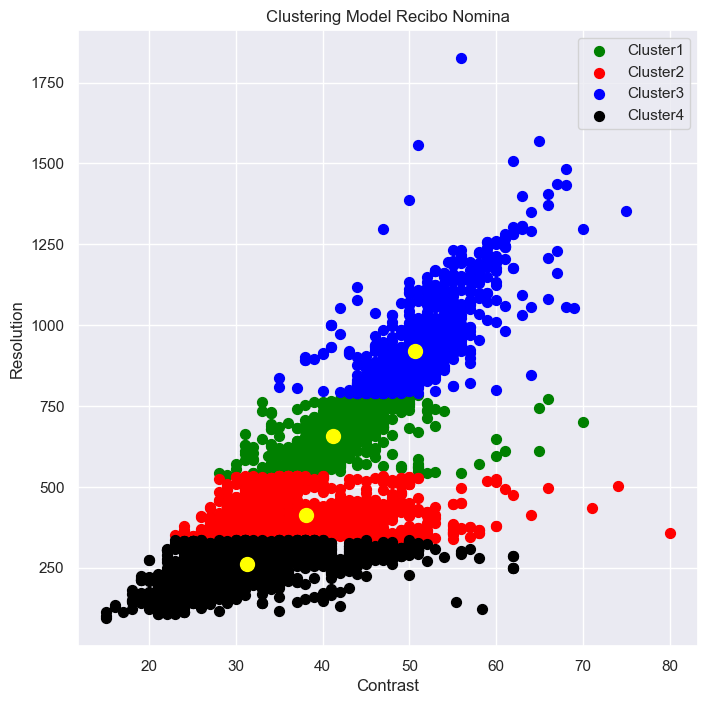

In [181]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c="black", label="Cluster4")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model Recibo Nomina")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

## Model- INE

In [182]:
filt_df_ine.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
3,ine,NaN,1,38,11,0.914,0.925,0.917,157.0,38.0,6140.0,356.0,INE
7,ine,NaN,1,38,11,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
9,ine,NaN,1,38,11,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
16,ine,NaN,1,38,11,0.834,0.922,0.860,60.0,50.0,3054.0,354.0,INE
22,ine,NaN,1,38,7,0.921,0.912,0.918,92.0,47.0,4423.0,422.0,INE


In [183]:
filt_df_ine.drop(columns=["Model","ClassId"], inplace=True)
filt_df_ine

/var/folders/hc/3khftnwn5j75vz_4z4391z9r0000gn/T/ipykernel_16515/3757691943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df_ine.drop(columns=["Model","ClassId"], inplace=True)


,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
3,1,38,11,0.914,0.925,0.917,157.000000,38.000000,6140.000000,356.000000,INE
7,1,38,11,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,INE
9,1,38,11,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,INE
16,1,38,11,0.834,0.922,0.860,60.000000,50.000000,3054.000000,354.000000,INE
22,1,38,7,0.921,0.912,0.918,92.000000,47.000000,4423.000000,422.000000,INE
...,...,...,...,...,...,...,...,...,...,...,...
62953,1,0,0,0.921,0.898,0.914,16.025871,54.774901,877.815515,292.559381,INE
62954,1,0,0,0.890,0.858,0.880,154.003010,54.145711,8338.602571,748.116796,INE
62957,1,0,0,0.919,0.876,0.906,62.585067,32.024602,2004.261874,207.442956,INE
62958,1,0,0,0.890,0.897,0.892,65.723136,45.672921,3001.767591,570.779433,INE


In [184]:
filt_df_ine["DocType"].value_counts()

DocType
INE     9336
PASS      10
Name: count, dtype: int64

In [185]:
filt_df_ine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9346 entries, 3 to 62959
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  9346 non-null   int64  
 1   Fields          9346 non-null   int64  
 2   EmptyFields     9346 non-null   int64  
 3   ConfR           9346 non-null   float64
 4   ConfA           9346 non-null   float64
 5   ConfW           9346 non-null   float64
 6   Sharpness       9346 non-null   float64
 7   Contrast        9346 non-null   float64
 8   Clarity         9346 non-null   float64
 9   Resolution      9346 non-null   float64
 10  DocType         9346 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 876.2+ KB


In [186]:
df_ine_coded = pd.get_dummies(filt_df_ine, columns=["DocType"], drop_first=False)
df_ine_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_INE,DocType_PASS
3,1,38,11,0.914,0.925,0.917,157.000000,38.000000,6140.000000,356.000000,True,False
7,1,38,11,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,True,False
9,1,38,11,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,True,False
16,1,38,11,0.834,0.922,0.860,60.000000,50.000000,3054.000000,354.000000,True,False
22,1,38,7,0.921,0.912,0.918,92.000000,47.000000,4423.000000,422.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62953,1,0,0,0.921,0.898,0.914,16.025871,54.774901,877.815515,292.559381,True,False
62954,1,0,0,0.890,0.858,0.880,154.003010,54.145711,8338.602571,748.116796,True,False
62957,1,0,0,0.919,0.876,0.906,62.585067,32.024602,2004.261874,207.442956,True,False
62958,1,0,0,0.890,0.897,0.892,65.723136,45.672921,3001.767591,570.779433,True,False


In [187]:
df_ine_coded.isnull().sum()

PagesProcessed    0
Fields            0
EmptyFields       0
ConfR             0
ConfA             0
ConfW             0
Sharpness         0
Contrast          0
Clarity           0
Resolution        0
DocType_INE       0
DocType_PASS      0
dtype: int64

## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [203]:
 X = df_ine_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=2, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

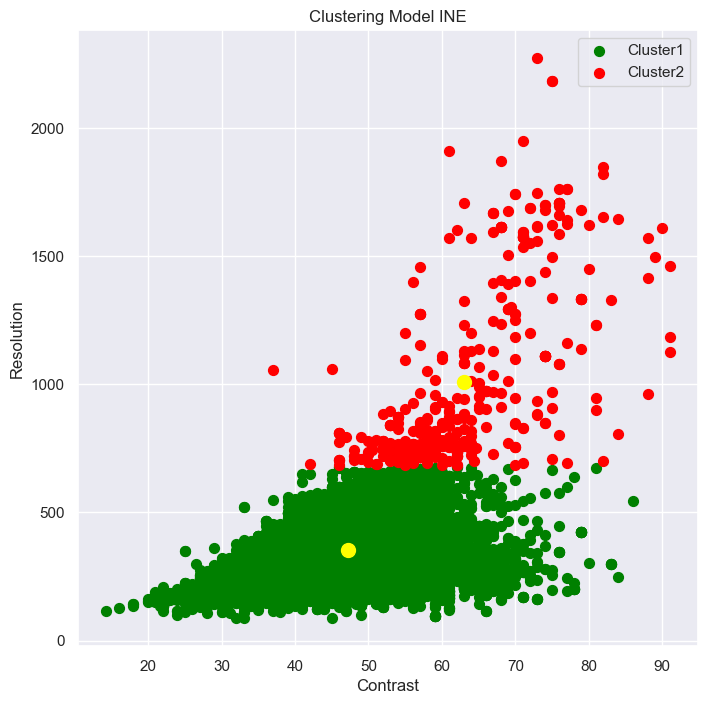

In [204]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model INE")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

## Model- Comprobante de domicilio

In [197]:
filt_df_comprobante_dom.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,comprobante_domicilio,NaN,1,12,0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
52,comprobante_domicilio,NaN,1,12,0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,CABLE
85,comprobante_domicilio,NaN,1,12,0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,CFE
122,comprobante_domicilio,NaN,1,12,0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,CFE
125,comprobante_domicilio,NaN,1,12,0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,CFE


In [199]:
filt_df_comprobante_dom.drop(columns=["Model","ClassId"], inplace=True)
filt_df_comprobante_dom

/var/folders/hc/3khftnwn5j75vz_4z4391z9r0000gn/T/ipykernel_16515/2842817070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df_comprobante_dom.drop(columns=["Model","ClassId"], inplace=True)


,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,1,12,0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
52,1,12,0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,CABLE
85,1,12,0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,CFE
122,1,12,0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,CFE
125,1,12,0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,CFE
...,...,...,...,...,...,...,...,...,...,...,...
61478,1,0,0,0.993,0.794,0.933,117.0,47.0,5577.0,399.0,CFE
61602,1,0,0,0.990,0.728,0.911,130.0,56.0,7378.0,498.0,CFE
61604,1,0,0,0.996,0.808,0.939,170.0,46.0,7907.0,536.0,CFE
61613,1,0,0,0.998,0.689,0.905,97.0,54.0,5350.0,501.0,CFE


In [200]:
filt_df_comprobante_dom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5780 entries, 0 to 61619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  5780 non-null   int64  
 1   Fields          5780 non-null   int64  
 2   EmptyFields     5780 non-null   int64  
 3   ConfR           5780 non-null   float64
 4   ConfA           5780 non-null   float64
 5   ConfW           5780 non-null   float64
 6   Sharpness       5780 non-null   float64
 7   Contrast        5780 non-null   float64
 8   Clarity         5780 non-null   float64
 9   Resolution      5780 non-null   float64
 10  DocType         5780 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 541.9+ KB


In [201]:
df_comprobante_dom_coded = pd.get_dummies(filt_df_comprobante_dom, columns=["DocType"], drop_first=False)
df_comprobante_dom_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_AGUA,DocType_CABLE,DocType_CFE,DocType_CONST,DocType_GAS,DocType_TEL
0,1,12,0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,False,False,True,False,False,False
52,1,12,0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,False,True,False,False,False,False
85,1,12,0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,False,False,True,False,False,False
122,1,12,0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,False,False,True,False,False,False
125,1,12,0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61478,1,0,0,0.993,0.794,0.933,117.0,47.0,5577.0,399.0,False,False,True,False,False,False
61602,1,0,0,0.990,0.728,0.911,130.0,56.0,7378.0,498.0,False,False,True,False,False,False
61604,1,0,0,0.996,0.808,0.939,170.0,46.0,7907.0,536.0,False,False,True,False,False,False
61613,1,0,0,0.998,0.689,0.905,97.0,54.0,5350.0,501.0,False,False,True,False,False,False


In [202]:
df_comprobante_dom_coded.isnull().sum()

PagesProcessed    0
Fields            0
EmptyFields       0
ConfR             0
ConfA             0
ConfW             0
Sharpness         0
Contrast          0
Clarity           0
Resolution        0
DocType_AGUA      0
DocType_CABLE     0
DocType_CFE       0
DocType_CONST     0
DocType_GAS       0
DocType_TEL       0
dtype: int64

## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [219]:
 X = df_comprobante_dom_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=6, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

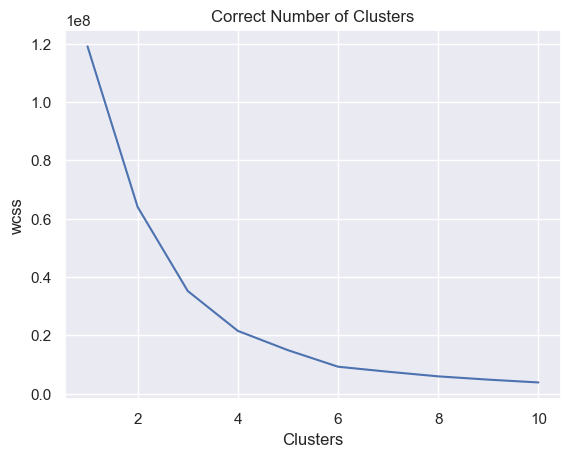

In [220]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

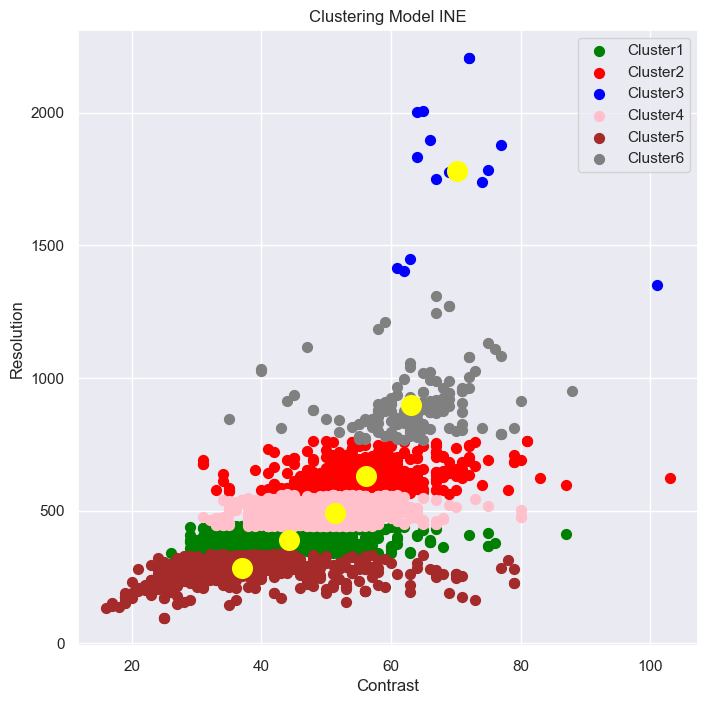

In [222]:
plt.figure(figsize=(8,8))


plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c="pink", label="Cluster4")
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c="brown", label="Cluster5")
plt.scatter(X[Y == 5, 0], X[Y == 5, 1], s=50, c="gray", label="Cluster6")  # Changed silver to gray

# Plot centroids with a distinct marker and larger size
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c="yellow")

plt.legend()
plt.title("Clustering Model Comprobante de Domicilio")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

## Model- Carta Libranza

In [223]:
filt_df_carta_lib.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
6,carta_libranza,NaN,1,19,0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
8,carta_libranza,NaN,1,19,0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
21,carta_libranza,NaN,1,19,0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,CLIB
23,carta_libranza,NaN,1,19,0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,CLIB
25,carta_libranza,NaN,1,19,0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,CLIB


In [224]:
filt_df_carta_lib.drop(columns=["Model","ClassId"], inplace=True)
filt_df_carta_lib

/var/folders/hc/3khftnwn5j75vz_4z4391z9r0000gn/T/ipykernel_16515/3382664569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df_carta_lib.drop(columns=["Model","ClassId"], inplace=True)


,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
6,1,19,0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
8,1,19,0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
21,1,19,0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,CLIB
23,1,19,0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,CLIB
25,1,19,0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,CLIB
...,...,...,...,...,...,...,...,...,...,...,...
61593,1,0,0,0.999,0.963,0.988,1319.0,52.0,69890.0,437.0,CLIB
61595,1,0,0,0.999,0.962,0.988,1331.0,53.0,70704.0,441.0,CLIB
61597,1,0,0,0.995,0.965,0.986,1124.0,51.0,57717.0,371.0,CLIB
61599,1,0,0,0.990,0.961,0.981,1115.0,51.0,57117.0,369.0,CLIB


In [225]:
filt_df_carta_lib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 6 to 61601
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  3501 non-null   int64  
 1   Fields          3501 non-null   int64  
 2   EmptyFields     3501 non-null   int64  
 3   ConfR           3501 non-null   float64
 4   ConfA           3501 non-null   float64
 5   ConfW           3501 non-null   float64
 6   Sharpness       3501 non-null   float64
 7   Contrast        3501 non-null   float64
 8   Clarity         3501 non-null   float64
 9   Resolution      3501 non-null   float64
 10  DocType         3501 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 328.2+ KB


In [226]:
df_carta_lib_coded = pd.get_dummies(filt_df_carta_lib, columns=["DocType"], drop_first=False)
df_carta_lib_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_CLIB
6,1,19,0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,True
8,1,19,0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,True
21,1,19,0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,True
23,1,19,0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,True
25,1,19,0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,True
...,...,...,...,...,...,...,...,...,...,...,...
61593,1,0,0,0.999,0.963,0.988,1319.0,52.0,69890.0,437.0,True
61595,1,0,0,0.999,0.962,0.988,1331.0,53.0,70704.0,441.0,True
61597,1,0,0,0.995,0.965,0.986,1124.0,51.0,57717.0,371.0,True
61599,1,0,0,0.990,0.961,0.981,1115.0,51.0,57117.0,369.0,True


## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [229]:
 X = df_carta_lib_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

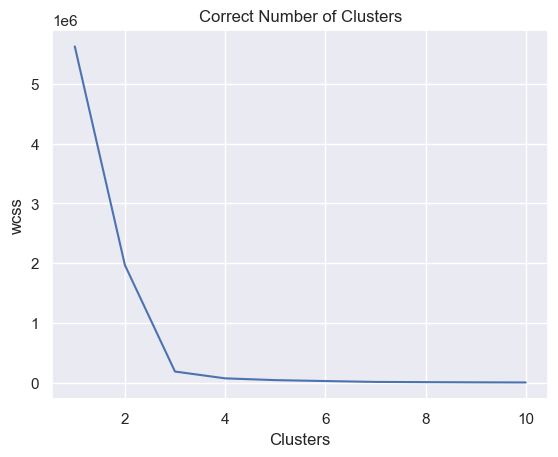

In [230]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

In [237]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


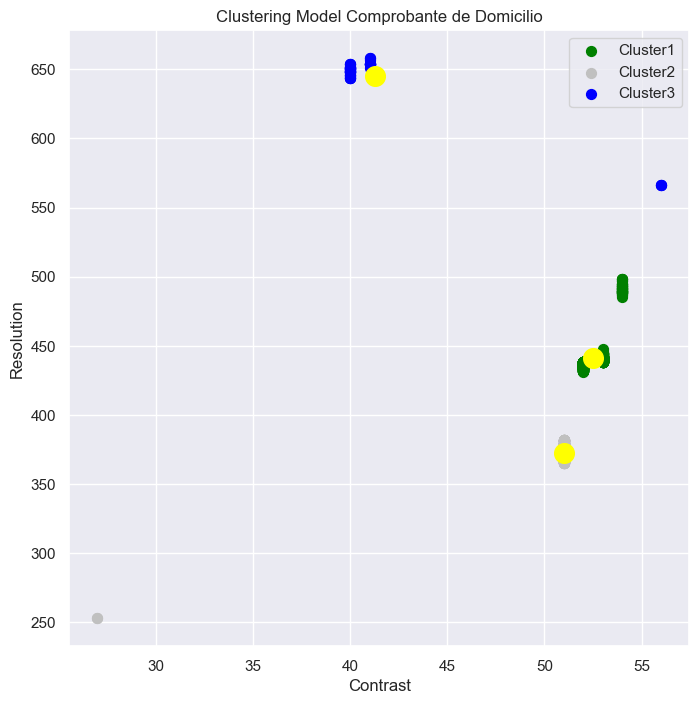

In [238]:
plt.figure(figsize=(8,8))


plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c="silver", label="Cluster2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c="blue", label="Cluster3")


# Plot centroids with a distinct marker and larger size
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c="yellow")

plt.legend()
plt.title("Clustering Model Comprobante de Domicilio")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()